In [1]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import CSVLogger
import os
# print(os.getcwd())
path = os.getcwd() + '/dataset_128px_tr'
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train= path+'/train', test= path+'/test', valid_pct=0.2, size=224, resize_method=ResizeMethod.SQUISH, num_workers=8, bs=32)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (140800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
CPFSK,CPFSK,CPFSK,CPFSK,CPFSK
Path: /home/adeebabbas/Desktop/radio/RML2016.10a/dataset_128px_tr;

Valid: LabelList (35200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
GFSK,CPFSK,CPFSK,QPSK,BPSK
Path: /home/adeebabbas/Desktop/radio/RML2016.10a/dataset_128px_tr;

Test: LabelList (44000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /home/adeebabbas/Desktop/radio/RML2016.10a/dataset_128px_tr

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 6.31E-06


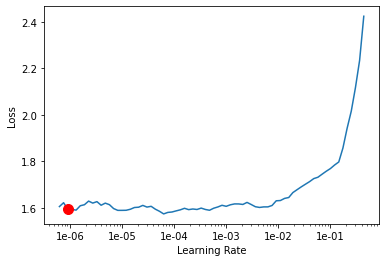

In [2]:
learn = cnn_learner(data, models.densenet121, metrics=[accuracy, error_rate], callback_fns=[CSVLogger])
learn.load('stg2_10eps')
learn.lr_find()
learn.recorder.plot(suggestion=True)

Min numerical gradient: 9.12E-07
Min loss divided by 10: 6.31E-06
9.120108393559096e-07


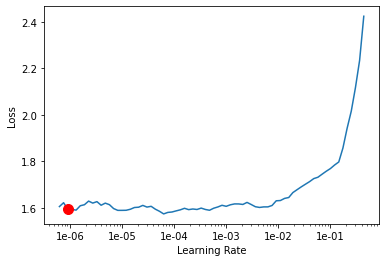

In [6]:
learn.recorder.plot(suggestion=True)
lr = learn.recorder.min_grad_lr
print(lr)

In [9]:
learn.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.679460,1.680701,0.363835,0.636165,33:53
